In [1]:
pip install tensorflow numpy matplotlib scikit-learn

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import os
import tempfile
from tensorflow.keras import regularizers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/train'

#Первая попытка

In [ ]:
# Параметры изображений
img_height, img_width = 512, 384 # Размер изображений
batch_size = 16

In [ ]:
# Создание генератора данных для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация пикселей
    validation_split=0.20
    #rotation_range=30,
)

In [ ]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical', # Для многоклассовой классификации
    subset='training'
)

Found 332 images belonging to 8 classes.


In [ ]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 83 images belonging to 8 classes.


In [ ]:
model = Sequential([
    # Первый блок (выход: 510×382×32)
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 384, 3), padding='valid'),
    MaxPooling2D(2, 2),  # 255×191×32

    # Второй блок (выход: 253×189×64)
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 126×94×64

    # Третий блок (выход: 124×92×128)
    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 62×46×128

    Flatten(),  # 62 × 46 × 128 = 365056 элементов

    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Обучение модели
history = model.fit(
    train_generator,
    epochs=10,  # Количество эпох
    validation_data=val_generator  # Опционально
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 545s 26s/step - accuracy: 0.2072 - loss: 5.7134 - val_accuracy: 0.1687 - val_loss: 1.7744
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7237 - loss: 0.9097 - val_accuracy: 0.5663 - val_loss: 1.0760
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9002 - loss: 0.3356 - val_accuracy: 0.7108 - val_loss: 0.7862
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9939 - loss: 0.0392 - val_accuracy: 0.6988 - val_loss: 1.2503
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9928 - loss: 0.0490 - val_accuracy: 0.6265 - val_loss: 1.0568
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9861 - loss: 0.0330 - val_accuracy: 0.7108 - val_loss: 1.0614
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.6627 - val_loss: 1.2666
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.6867 - val_los

In [ ]:
# Создаём генератор для объединённых данных
full_datagen = ImageDataGenerator(rescale=1./255)
full_generator = full_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Если важно сохранить порядок
)

# Оценка модели
full_loss, full_accuracy = model.evaluate(full_generator)
print(f"Точность на всём датасете: {full_accuracy * 100:.2f}%")

Found 520 images belonging to 8 classes.
33/33 ━━━━━━━━━━━━━━━━━━━━ 219s 7s/step - accuracy: 0.8963 - loss: 1.0702
Точность на всём датасете: 75.19%


In [ ]:
full_loss, full_accuracy = model.evaluate(val_generator)
print(f"Точность на тестовой выборке: {full_accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6590 - loss: 1.2666
Точность на тестовой выборке: 67.47%


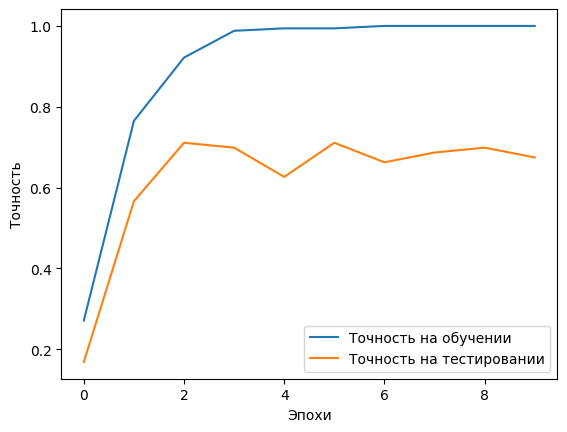

In [ ]:
# Визуализация точности и потерь
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

#Вторая попытка

In [ ]:
# Параметры изображений
img_height, img_width = 512, 384 # Размер изображений
batch_size = 16

In [ ]:
# Создание генератора данных для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация пикселей
    validation_split=0.20
    #rotation_range=30,
)

In [ ]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical', # Для многоклассовой классификации
    subset='training'
)

Found 416 images belonging to 8 classes.


In [ ]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 104 images belonging to 8 classes.


In [ ]:
model = Sequential([
    # Первый блок (выход: 510×382×32)
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 384, 3), padding='valid'),
    MaxPooling2D(2, 2),  # 255×191×32

    # Второй блок (выход: 253×189×64)
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 126×94×64

    # Третий блок (выход: 124×92×128)
    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 62×46×128

    Flatten(),  # 62 × 46 × 128 = 365056 элементов

    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 384, 3), padding='valid'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Обучение модели
history = model.fit(
    train_generator,
    epochs=10,  # Количество эпох
    validation_data=val_generator  # Опционально
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 545s 26s/step - accuracy: 0.2072 - loss: 5.7134 - val_accuracy: 0.1687 - val_loss: 1.7744
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7237 - loss: 0.9097 - val_accuracy: 0.5663 - val_loss: 1.0760
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9002 - loss: 0.3356 - val_accuracy: 0.7108 - val_loss: 0.7862
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9939 - loss: 0.0392 - val_accuracy: 0.6988 - val_loss: 1.2503
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9928 - loss: 0.0490 - val_accuracy: 0.6265 - val_loss: 1.0568
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9861 - loss: 0.0330 - val_accuracy: 0.7108 - val_loss: 1.0614
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.6627 - val_loss: 1.2666
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.6867 - val_los

In [ ]:
# Callback для сохранения лучших весов модели
checkpoint = ModelCheckpoint(
    'best_model.h5',             # имя файла для сохранения
    monitor='val_accuracy',       # мониторим точность на валидации
    save_best_only=True,          # сохраняем только лучшую модель
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации о сохранении
)

In [ ]:
# Callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # мониторим точность на валидации
    patience=5,                   # ждём 5 эпох без улучшения
    restore_best_weights=True,    # восстанавливаем веса лучшей модели
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации об остановке
)

In [ ]:
# Обучение модели с callback'ами
history = model.fit(
    train_generator,
    epochs=50,                    # теперь можно поставить больше эпох
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]  # добавляем наши callback'и
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.1393 - loss: 11.1736 
Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to best_model.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 697s 26s/step - accuracy: 0.1397 - loss: 11.0326 - val_accuracy: 0.1250 - val_loss: 4.4890
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2185 - loss: 4.1132
Epoch 2: val_accuracy did not improve from 0.12500
26/26 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.2193 - loss: 4.0988 - val_accuracy: 0.0962 - val_loss: 3.1859
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4397 - loss: 2.7987
Epoch 3: val_accuracy improved from 0.12500 to 0.29808, saving model to best_model.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.4411 - loss: 2.7891 - val_accuracy: 0.2981 - val_loss: 2.6645
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6121 - loss: 1.9736
Epoch 4: val_accuracy improved from 0.29808 to 0.44231, saving model to best_model.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.6131 - loss: 1.9707 - val_accuracy: 0.4423 - val_loss: 2.4452
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7046 - loss: 1.7211
Epoch 5: val_accuracy improved from 0.44231 to 0.68269, saving model to best_model.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.7068 - loss: 1.7171 - val_accuracy: 0.6827 - val_loss: 1.8580
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8339 - loss: 1.2425
Epoch 6: val_accuracy did not improve from 0.68269
26/26 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8332 - loss: 1.2444 - val_accuracy: 0.5385 - val_loss: 2.0549
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8634 - loss: 1.2115
Epoch 7: val_accuracy did not improve from 0.68269
26/26 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8637 - loss: 1.2095 - val_accuracy: 0.5769 - val_loss: 1.9977
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8875 - loss: 1.0492
Epoch 8: val_accuracy did not improve from 0.68269
26/26 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.8872 - loss: 1.0493 - val_accuracy: 0.5769 - val_loss: 1.6728
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9108 - loss: 0.9386
Epoch 9: val_accuracy did not improve from 0.68269
26/2

In [ ]:
# Создаём генератор для объединённых данных
full_datagen = ImageDataGenerator(rescale=1./255)
full_generator = full_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Если важно сохранить порядок
)

# Оценка модели
full_loss, full_accuracy = model.evaluate(full_generator)
print(f"Точность на всём датасете: {full_accuracy * 100:.2f}%")

Found 520 images belonging to 8 classes.
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9075 - loss: 1.2018
Точность на всём датасете: 91.35%


In [ ]:
full_loss, full_accuracy = model.evaluate(val_generator)
print(f"Точность на тестовой выборке: {full_accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6696 - loss: 1.8800
Точность на тестовой выборке: 68.27%


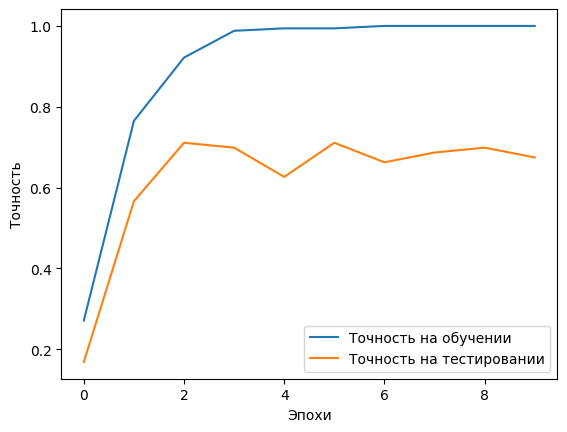

In [ ]:
# Визуализация точности и потерь
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

#Третья попытка

In [ ]:
# Параметры изображений
img_height, img_width = 512, 384 # Размер изображений
batch_size = 8

In [ ]:
# Создание генератора данных для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация пикселей
    validation_split=0.20
    #rotation_range=30,
)

In [ ]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical', # Для многоклассовой классификации
    subset='training'
)

Found 416 images belonging to 8 classes.


In [ ]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 104 images belonging to 8 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 384, 3), padding='valid'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Callback для сохранения лучших весов модели
checkpoint = ModelCheckpoint(
    'best_model.h5',             # имя файла для сохранения
    monitor='val_accuracy',       # мониторим точность на валидации
    save_best_only=True,          # сохраняем только лучшую модель
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации о сохранении
)

In [ ]:
# Callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # мониторим точность на валидации
    patience=15,                   # ждём 5 эпох без улучшения
    restore_best_weights=True,    # восстанавливаем веса лучшей модели
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации об остановке
)

In [ ]:
# Обучение модели с callback'ами
history = model.fit(
    train_generator,
    epochs=75,                    # теперь можно поставить больше эпох
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]  # добавляем наши callback'и
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1589 - loss: 9.4627
Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 409s 8s/step - accuracy: 0.1591 - loss: 9.3991 - val_accuracy: 0.1250 - val_loss: 3.5062
Epoch 2/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.2871 - loss: 2.9348
Epoch 2: val_accuracy improved from 0.12500 to 0.33654, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.2882 - loss: 2.9280 - val_accuracy: 0.3365 - val_loss: 2.3165
Epoch 3/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.5796 - loss: 1.8578
Epoch 3: val_accuracy improved from 0.33654 to 0.47115, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5793 - loss: 1.8573 - val_accuracy: 0.4712 - val_loss: 2.0061
Epoch 4/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 951ms/step - accuracy: 0.6573 - loss: 1.4590
Epoch 4: val_accuracy improved from 0.47115 to 0.53846, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.6577 - loss: 1.4588 - val_accuracy: 0.5385 - val_loss: 1.7931
Epoch 5/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.8123 - loss: 1.1893
Epoch 5: val_accuracy improved from 0.53846 to 0.61538, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8114 - loss: 1.1907 - val_accuracy: 0.6154 - val_loss: 1.6569
Epoch 6/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.8332 - loss: 1.0598
Epoch 6: val_accuracy improved from 0.61538 to 0.63462, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8333 - loss: 1.0589 - val_accuracy: 0.6346 - val_loss: 1.3619
Epoch 7/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.8620 - loss: 0.8894
Epoch 7: val_accuracy improved from 0.63462 to 0.70192, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8620 - loss: 0.8890 - val_accuracy: 0.7019 - val_loss: 1.2967
Epoch 8/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.8529 - loss: 0.8639
Epoch 8: val_accuracy did not improve from 0.70192
52/52 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8525 - loss: 0.8655 - val_accuracy: 0.5673 - val_loss: 1.5976
Epoch 9/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 917ms/step - accuracy: 0.8183 - loss: 0.9621
Epoch 9: val_accuracy did not improve from 0.70192
52/52 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8186 - loss: 0.9622 - val_accuracy: 0.7019 - val_loss: 1.1960
Epoch 10/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 0.8699 - loss: 0.8696
Epoch 10: val_accuracy did not improve from 0.70192
52/52 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8698 - loss: 0.8691 - val_accuracy: 0.5769 - val_loss: 1.3993
Epoch 11/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.8330 - loss: 0.9207
Epoch 11: val_accuracy did not improve f

In [ ]:
# Создаём генератор для объединённых данных
full_datagen = ImageDataGenerator(rescale=1./255)
full_generator = full_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Если важно сохранить порядок
)

# Оценка модели
full_loss, full_accuracy = model.evaluate(full_generator)
print(f"Точность на всём датасете: {full_accuracy * 100:.2f}%")

Found 520 images belonging to 8 classes.
65/65 ━━━━━━━━━━━━━━━━━━━━ 64s 983ms/step - accuracy: 0.8947 - loss: 0.7544
Точность на всём датасете: 92.31%


In [ ]:
full_loss, full_accuracy = model.evaluate(val_generator)
print(f"Точность на тестовой выборке: {full_accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 962ms/step - accuracy: 0.6561 - loss: 1.3757
Точность на тестовой выборке: 70.19%


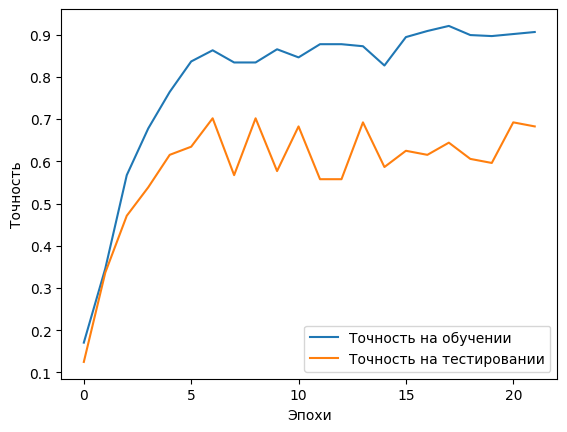

In [ ]:
# Визуализация точности и потерь
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

#Четвёртая попытка

In [ ]:
# Параметры изображений
img_height, img_width = 512, 384 # Размер изображений
batch_size = 4

In [ ]:
# Создание генератора данных для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация пикселей
    validation_split=0.20
    #rotation_range=30,
)

In [ ]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical', # Для многоклассовой классификации
    subset='training'
)

Found 416 images belonging to 8 classes.


In [ ]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 104 images belonging to 8 classes.


In [ ]:
model = Sequential([
    # Первый блок (выход: 510×382×32)
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 384, 3), padding='valid'),
    MaxPooling2D(2, 2),  # 255×191×32

    # Второй блок (выход: 253×189×64)
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 126×94×64

    # Третий блок (выход: 124×92×128)
    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 62×46×128

    Flatten(),  # 62 × 46 × 128 = 365056 элементов

    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 384, 3), padding='valid'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callback для сохранения лучших весов модели
checkpoint = ModelCheckpoint(
    'best_model.h5',             # имя файла для сохранения
    monitor='val_accuracy',       # мониторим точность на валидации
    save_best_only=True,          # сохраняем только лучшую модель
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации о сохранении
)

In [ ]:
# Callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # мониторим точность на валидации
    patience=15,                   # ждём 5 эпох без улучшения
    restore_best_weights=True,    # восстанавливаем веса лучшей модели
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации об остановке
)

In [ ]:
# Обучение модели с callback'ами
history = model.fit(
    train_generator,
    epochs=75,                    # теперь можно поставить больше эпох
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]  # добавляем наши callback'и
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1371 - loss: 4.8058
Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 673s 6s/step - accuracy: 0.1374 - loss: 4.7942 - val_accuracy: 0.1250 - val_loss: 2.3565
Epoch 2/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.1771 - loss: 2.2615
Epoch 2: val_accuracy improved from 0.12500 to 0.26923, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 75s 723ms/step - accuracy: 0.1772 - loss: 2.2615 - val_accuracy: 0.2692 - val_loss: 2.2416
Epoch 3/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.3492 - loss: 2.2117
Epoch 3: val_accuracy improved from 0.26923 to 0.28846, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 74s 712ms/step - accuracy: 0.3493 - loss: 2.2118 - val_accuracy: 0.2885 - val_loss: 2.3315
Epoch 4/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.3903 - loss: 2.0090
Epoch 4: val_accuracy improved from 0.28846 to 0.30769, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 64s 614ms/step - accuracy: 0.3906 - loss: 2.0086 - val_accuracy: 0.3077 - val_loss: 2.0883
Epoch 5/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.5898 - loss: 1.6933
Epoch 5: val_accuracy improved from 0.30769 to 0.50962, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 66s 631ms/step - accuracy: 0.5897 - loss: 1.6933 - val_accuracy: 0.5096 - val_loss: 2.1424
Epoch 6/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.6564 - loss: 1.4514
Epoch 6: val_accuracy did not improve from 0.50962
104/104 ━━━━━━━━━━━━━━━━━━━━ 75s 561ms/step - accuracy: 0.6563 - loss: 1.4518 - val_accuracy: 0.5000 - val_loss: 1.8906
Epoch 7/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.7120 - loss: 1.3340
Epoch 7: val_accuracy improved from 0.50962 to 0.54808, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 72s 698ms/step - accuracy: 0.7120 - loss: 1.3338 - val_accuracy: 0.5481 - val_loss: 1.8888
Epoch 8/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.7463 - loss: 1.2259
Epoch 8: val_accuracy did not improve from 0.54808
104/104 ━━━━━━━━━━━━━━━━━━━━ 58s 562ms/step - accuracy: 0.7464 - loss: 1.2252 - val_accuracy: 0.5192 - val_loss: 1.9867
Epoch 9/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.7146 - loss: 1.2016
Epoch 9: val_accuracy did not improve from 0.54808
104/104 ━━━━━━━━━━━━━━━━━━━━ 67s 647ms/step - accuracy: 0.7145 - loss: 1.2028 - val_accuracy: 0.5192 - val_loss: 1.9109
Epoch 10/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.7692 - loss: 1.1946
Epoch 10: val_accuracy improved from 0.54808 to 0.62500, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 64s 620ms/step - accuracy: 0.7689 - loss: 1.1956 - val_accuracy: 0.6250 - val_loss: 1.9727
Epoch 11/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.7781 - loss: 1.2961
Epoch 11: val_accuracy did not improve from 0.62500
104/104 ━━━━━━━━━━━━━━━━━━━━ 60s 578ms/step - accuracy: 0.7781 - loss: 1.2960 - val_accuracy: 0.5673 - val_loss: 2.4142
Epoch 12/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.7643 - loss: 1.3354
Epoch 12: val_accuracy improved from 0.62500 to 0.68269, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 68s 652ms/step - accuracy: 0.7643 - loss: 1.3353 - val_accuracy: 0.6827 - val_loss: 1.4671
Epoch 13/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.8144 - loss: 1.0346
Epoch 13: val_accuracy did not improve from 0.68269
104/104 ━━━━━━━━━━━━━━━━━━━━ 59s 572ms/step - accuracy: 0.8142 - loss: 1.0353 - val_accuracy: 0.5288 - val_loss: 2.0214
Epoch 14/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.7860 - loss: 1.2131
Epoch 14: val_accuracy improved from 0.68269 to 0.71154, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 74s 709ms/step - accuracy: 0.7863 - loss: 1.2118 - val_accuracy: 0.7115 - val_loss: 1.2602
Epoch 15/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.8282 - loss: 0.9719
Epoch 15: val_accuracy did not improve from 0.71154
104/104 ━━━━━━━━━━━━━━━━━━━━ 59s 570ms/step - accuracy: 0.8279 - loss: 0.9731 - val_accuracy: 0.5962 - val_loss: 1.8323
Epoch 16/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.8287 - loss: 1.0509
Epoch 16: val_accuracy did not improve from 0.71154
104/104 ━━━━━━━━━━━━━━━━━━━━ 59s 569ms/step - accuracy: 0.8285 - loss: 1.0509 - val_accuracy: 0.6731 - val_loss: 1.7328
Epoch 17/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.8780 - loss: 0.9835
Epoch 17: val_accuracy did not improve from 0.71154
104/104 ━━━━━━━━━━━━━━━━━━━━ 57s 551ms/step - accuracy: 0.8778 - loss: 0.9835 - val_accuracy: 0.6827 - val_loss: 1.6609
Epoch 18/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.8439 - loss: 1.0141
Epoch 18

104/104 ━━━━━━━━━━━━━━━━━━━━ 68s 651ms/step - accuracy: 0.8437 - loss: 1.0142 - val_accuracy: 0.7500 - val_loss: 1.3995
Epoch 19/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.8333 - loss: 1.1365
Epoch 19: val_accuracy did not improve from 0.75000
104/104 ━━━━━━━━━━━━━━━━━━━━ 71s 682ms/step - accuracy: 0.8332 - loss: 1.1372 - val_accuracy: 0.6154 - val_loss: 1.9614
Epoch 20/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.8679 - loss: 1.0158
Epoch 20: val_accuracy did not improve from 0.75000
104/104 ━━━━━━━━━━━━━━━━━━━━ 68s 654ms/step - accuracy: 0.8678 - loss: 1.0158 - val_accuracy: 0.6058 - val_loss: 2.1821
Epoch 21/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.8496 - loss: 1.0597
Epoch 21: val_accuracy did not improve from 0.75000
104/104 ━━━━━━━━━━━━━━━━━━━━ 60s 577ms/step - accuracy: 0.8496 - loss: 1.0595 - val_accuracy: 0.7404 - val_loss: 1.5177
Epoch 22/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8499 - loss: 1.1497
Epoch 22

In [ ]:
# Создаём генератор для объединённых данных
full_datagen = ImageDataGenerator(rescale=1./255)
full_generator = full_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Если важно сохранить порядок
)

# Оценка модели
full_loss, full_accuracy = model.evaluate(full_generator)
print(f"Точность на всём датасете: {full_accuracy * 100:.2f}%")

Found 520 images belonging to 8 classes.
130/130 ━━━━━━━━━━━━━━━━━━━━ 58s 448ms/step - accuracy: 0.8542 - loss: 1.0484
Точность на всём датасете: 90.38%


In [ ]:
full_loss, full_accuracy = model.evaluate(val_generator)
print(f"Точность на тестовой выборке: {full_accuracy * 100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 450ms/step - accuracy: 0.7744 - loss: 1.3081
Точность на тестовой выборке: 75.00%


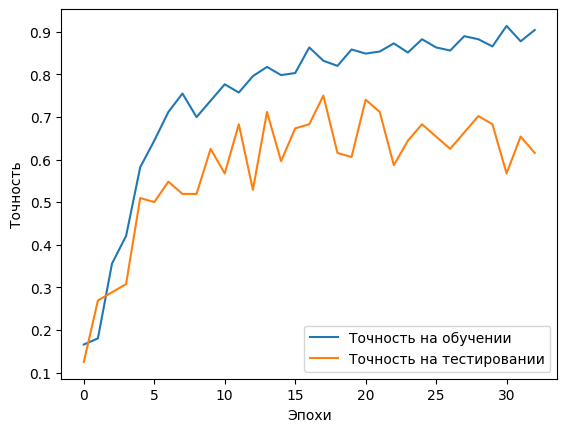

In [ ]:
# Визуализация точности и потерь
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

#Пятая попытка

In [ ]:
# Параметры изображений
img_height, img_width = 512, 384 # Размер изображений
batch_size = 2

In [ ]:
# Создание генератора данных для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация пикселей
    validation_split=0.20
    #rotation_range=30,
)

In [ ]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical', # Для многоклассовой классификации
    subset='training'
)

Found 416 images belonging to 8 classes.


In [ ]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 104 images belonging to 8 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 384, 3), padding='valid'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callback для сохранения лучших весов модели
checkpoint = ModelCheckpoint(
    'best_model.h5',             # имя файла для сохранения
    monitor='val_accuracy',       # мониторим точность на валидации
    save_best_only=True,          # сохраняем только лучшую модель
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации о сохранении
)

In [ ]:
# Callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # мониторим точность на валидации
    patience=15,                   # ждём 5 эпох без улучшения
    restore_best_weights=True,    # восстанавливаем веса лучшей модели
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации об остановке
)

In [ ]:
# Обучение модели с callback'ами
history = model.fit(
    train_generator,
    epochs=75,                    # теперь можно поставить больше эпох
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]  # добавляем наши callback'и
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1167 - loss: 5.3812
Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to best_model.h5


208/208 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.1167 - loss: 5.3727 - val_accuracy: 0.1250 - val_loss: 2.1968
Epoch 2/75
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.0794 - loss: 2.1448
Epoch 2: val_accuracy did not improve from 0.12500
208/208 ━━━━━━━━━━━━━━━━━━━━ 69s 333ms/step - accuracy: 0.0794 - loss: 2.1447 - val_accuracy: 0.1250 - val_loss: 2.0853
Epoch 3/75
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.1277 - loss: 2.0834
Epoch 3: val_accuracy did not improve from 0.12500
208/208 ━━━━━━━━━━━━━━━━━━━━ 71s 343ms/step - accuracy: 0.1276 - loss: 2.0834 - val_accuracy: 0.1250 - val_loss: 2.0799
Epoch 4/75
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.1389 - loss: 2.0802
Epoch 4: val_accuracy did not improve from 0.12500
208/208 ━━━━━━━━━━━━━━━━━━━━ 74s 358ms/step - accuracy: 0.1389 - loss: 2.0802 - val_accuracy: 0.1250 - val_loss: 2.0795
Epoch 5/75
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.1209 - loss: 2.0799
Epoch 5: val_accu

KeyboardInterrupt: 

#Шестая попытка

In [ ]:
# Параметры изображений
img_height, img_width = 512, 384 # Размер изображений

In [ ]:
# Создание генератора данных для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация пикселей
    validation_split=0.20
    #rotation_range=30,
)

In [ ]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=8,
    class_mode='categorical', # Для многоклассовой классификации
    subset='training'
)

Found 416 images belonging to 8 classes.


In [ ]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

Found 104 images belonging to 8 classes.


In [ ]:
model = Sequential([
    # Первый блок (выход: 510×382×32)
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 384, 3), padding='valid'),
    MaxPooling2D(2, 2),  # 255×191×32

    # Второй блок (выход: 253×189×64)
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 126×94×64

    # Третий блок (выход: 124×92×128)
    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 62×46×128

    Flatten(),  # 62 × 46 × 128 = 365056 элементов

    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callback для сохранения лучших весов модели
checkpoint = ModelCheckpoint(
    'best_model.h5',             # имя файла для сохранения
    monitor='val_accuracy',       # мониторим точность на валидации
    save_best_only=True,          # сохраняем только лучшую модель
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации о сохранении
)

In [ ]:
# Callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # мониторим точность на валидации
    patience=15,                   # ждём 5 эпох без улучшения
    restore_best_weights=True,    # восстанавливаем веса лучшей модели
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации об остановке
)

In [ ]:
# Обучение модели с callback'ами
history = model.fit(
    train_generator,
    epochs=75,                    # теперь можно поставить больше эпох
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]  # добавляем наши callback'и
)

Epoch 1/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.2188 - loss: 3.0193
Epoch 1: val_accuracy improved from -inf to 0.50962, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2215 - loss: 3.0008 - val_accuracy: 0.5096 - val_loss: 1.6424
Epoch 2/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 899ms/step - accuracy: 0.8187 - loss: 0.5452
Epoch 2: val_accuracy improved from 0.50962 to 0.53846, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8196 - loss: 0.5425 - val_accuracy: 0.5385 - val_loss: 1.8524
Epoch 3/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.9849 - loss: 0.0807
Epoch 3: val_accuracy improved from 0.53846 to 0.57692, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9848 - loss: 0.0802 - val_accuracy: 0.5769 - val_loss: 1.6441
Epoch 4/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9676 - loss: 0.1288
Epoch 4: val_accuracy did not improve from 0.57692
52/52 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9674 - loss: 0.1288 - val_accuracy: 0.5288 - val_loss: 3.6663
Epoch 5/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 0.9950 - loss: 0.0323
Epoch 5: val_accuracy did not improve from 0.57692
52/52 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9950 - loss: 0.0322 - val_accuracy: 0.5385 - val_loss: 2.8376
Epoch 6/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 927ms/step - accuracy: 1.0000 - loss: 0.0124
Epoch 6: val_accuracy did not improve from 0.57692
52/52 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 0.5481 - val_loss: 1.9030
Epoch 7/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 7: val_accuracy improved from 0.57692 to

52/52 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.6538 - val_loss: 1.5889
Epoch 8/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 5.1599e-04
Epoch 8: val_accuracy improved from 0.65385 to 0.66346, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 1.0000 - loss: 5.1200e-04 - val_accuracy: 0.6635 - val_loss: 1.7314
Epoch 9/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 1.0000 - loss: 1.0975e-04
Epoch 9: val_accuracy did not improve from 0.66346
52/52 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 1.0000 - loss: 1.0977e-04 - val_accuracy: 0.6635 - val_loss: 1.6913
Epoch 10/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 1.0000 - loss: 8.2883e-05
Epoch 10: val_accuracy improved from 0.66346 to 0.68269, saving model to best_model.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 1.0000 - loss: 8.3001e-05 - val_accuracy: 0.6827 - val_loss: 1.6793
Epoch 11/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 1.0000 - loss: 6.6872e-05
Epoch 11: val_accuracy did not improve from 0.68269
52/52 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 1.0000 - loss: 6.7050e-05 - val_accuracy: 0.6827 - val_loss: 1.6757
Epoch 12/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 5.0138e-05
Epoch 12: val_accuracy did not improve from 0.68269
52/52 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 1.0000 - loss: 5.0425e-05 - val_accuracy: 0.6827 - val_loss: 1.6733
Epoch 13/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 1.0000 - loss: 4.5667e-05
Epoch 13: val_accuracy did not improve from 0.68269
52/52 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 1.0000 - loss: 4.5814e-05 - val_accuracy: 0.6827 - val_loss: 1.6812
Epoch 14/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 1.0000 - loss: 3.9392e-05
Epoch 1

52/52 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 1.0000 - loss: 2.6332e-05 - val_accuracy: 0.6923 - val_loss: 1.6515
Epoch 16/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 1.7432e-05
Epoch 16: val_accuracy did not improve from 0.69231
52/52 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 1.0000 - loss: 1.7419e-05 - val_accuracy: 0.6827 - val_loss: 1.6865
Epoch 17/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - accuracy: 1.0000 - loss: 1.3062e-05
Epoch 17: val_accuracy did not improve from 0.69231
52/52 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 1.0000 - loss: 1.3036e-05 - val_accuracy: 0.6827 - val_loss: 1.6619
Epoch 18/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 1.0000 - loss: 8.9839e-06
Epoch 18: val_accuracy did not improve from 0.69231
52/52 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 1.0000 - loss: 8.9815e-06 - val_accuracy: 0.6923 - val_loss: 1.6699
Epoch 19/75
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 1.0000 - loss: 6.9365e-06
Epoch 1

In [ ]:
# Создаём генератор для объединённых данных
full_datagen = ImageDataGenerator(rescale=1./255)
full_generator = full_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Если важно сохранить порядок
)

# Оценка модели
full_loss, full_accuracy = model.evaluate(full_generator)
print(f"Точность на всём датасете: {full_accuracy * 100:.2f}%")

Found 520 images belonging to 8 classes.
260/260 ━━━━━━━━━━━━━━━━━━━━ 66s 251ms/step - accuracy: 0.9350 - loss: 0.4005
Точность на всём датасете: 93.85%


In [ ]:
full_loss, full_accuracy = model.evaluate(val_generator)
print(f"Точность на тестовой выборке: {full_accuracy * 100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 434ms/step - accuracy: 0.6556 - loss: 1.8098
Точность на тестовой выборке: 69.23%


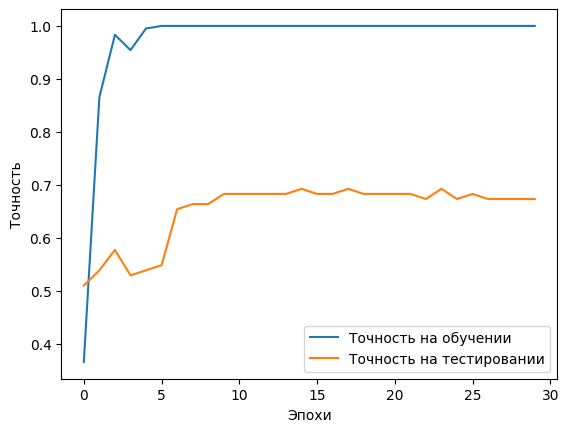

In [ ]:
# Визуализация точности и потерь
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

#Седьмая попытка

In [ ]:
# Параметры изображений
img_height, img_width = 512, 384 # Размер изображений

In [ ]:
# Создание генератора данных для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация пикселей
    validation_split=0.20
    #rotation_range=30,
)

In [ ]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=4,
    class_mode='categorical', # Для многоклассовой классификации
    subset='training'
)

Found 416 images belonging to 8 classes.


In [ ]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

Found 104 images belonging to 8 classes.


In [ ]:
model = Sequential([
    # Первый блок (выход: 510×382×32)
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 384, 3), padding='valid'),
    MaxPooling2D(2, 2),  # 255×191×32

    # Второй блок (выход: 253×189×64)
    Conv2D(64, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 126×94×64

    # Третий блок (выход: 124×92×128)
    Conv2D(128, (3, 3), activation='relu', padding='valid'),
    MaxPooling2D(2, 2),  # 62×46×128

    Flatten(),  # 62 × 46 × 128 = 365056 элементов

    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callback для сохранения лучших весов модели
checkpoint = ModelCheckpoint(
    'best_model.h5',             # имя файла для сохранения
    monitor='val_accuracy',       # мониторим точность на валидации
    save_best_only=True,          # сохраняем только лучшую модель
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации о сохранении
)

In [ ]:
# Callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # мониторим точность на валидации
    patience=15,                   # ждём 5 эпох без улучшения
    restore_best_weights=True,    # восстанавливаем веса лучшей модели
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации об остановке
)

In [ ]:
# Обучение модели с callback'ами
history = model.fit(
    train_generator,
    epochs=75,                    # теперь можно поставить больше эпох
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]  # добавляем наши callback'и
)

Epoch 1/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.2022 - loss: 5.1971
Epoch 1: val_accuracy improved from -inf to 0.54808, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 75s 674ms/step - accuracy: 0.2035 - loss: 5.1724 - val_accuracy: 0.5481 - val_loss: 1.1981
Epoch 2/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.8233 - loss: 0.5573
Epoch 2: val_accuracy did not improve from 0.54808
104/104 ━━━━━━━━━━━━━━━━━━━━ 61s 583ms/step - accuracy: 0.8235 - loss: 0.5566 - val_accuracy: 0.5192 - val_loss: 1.5122
Epoch 3/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.9418 - loss: 0.1783
Epoch 3: val_accuracy improved from 0.54808 to 0.63462, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 66s 638ms/step - accuracy: 0.9419 - loss: 0.1780 - val_accuracy: 0.6346 - val_loss: 1.0220
Epoch 4/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9667 - loss: 0.0863
Epoch 4: val_accuracy improved from 0.63462 to 0.65385, saving model to best_model.h5


104/104 ━━━━━━━━━━━━━━━━━━━━ 71s 679ms/step - accuracy: 0.9669 - loss: 0.0862 - val_accuracy: 0.6538 - val_loss: 1.1004
Epoch 5/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.9892 - loss: 0.0171
Epoch 5: val_accuracy did not improve from 0.65385
104/104 ━━━━━━━━━━━━━━━━━━━━ 64s 614ms/step - accuracy: 0.9892 - loss: 0.0172 - val_accuracy: 0.5962 - val_loss: 1.8684
Epoch 6/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.9927 - loss: 0.0221
Epoch 6: val_accuracy did not improve from 0.65385
104/104 ━━━━━━━━━━━━━━━━━━━━ 71s 686ms/step - accuracy: 0.9927 - loss: 0.0220 - val_accuracy: 0.6250 - val_loss: 1.5376
Epoch 7/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 7: val_accuracy did not improve from 0.65385
104/104 ━━━━━━━━━━━━━━━━━━━━ 63s 606ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.6154 - val_loss: 1.5661
Epoch 8/75
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 1.0000 - loss: 1.2943e-04
Epoch 8: va

104/104 ━━━━━━━━━━━━━━━━━━━━ 67s 640ms/step - accuracy: 1.0000 - loss: 1.2995e-05 - val_accuracy: 0.6635 - val_loss: 1.6411
Epoch 12/75
 49/104 ━━━━━━━━━━━━━━━━━━━━ 28s 517ms/step - accuracy: 1.0000 - loss: 9.8205e-06

In [ ]:
# Создаём генератор для объединённых данных
full_datagen = ImageDataGenerator(rescale=1./255)
full_generator = full_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Если важно сохранить порядок
)

# Оценка модели
full_loss, full_accuracy = model.evaluate(full_generator)
print(f"Точность на всём датасете: {full_accuracy * 100:.2f}%")

In [ ]:
full_loss, full_accuracy = model.evaluate(val_generator)
print(f"Точность на тестовой выборке: {full_accuracy * 100:.2f}%")

In [ ]:
# Визуализация точности и потерь
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

#Восьмая попытка

In [ ]:
# Параметры изображений
img_height, img_width = 512, 384 # Размер изображений
batch_size = 8

In [ ]:
# Создание генератора данных для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация пикселей
    rotation_range=3,       # случайный поворот на ±30°
    width_shift_range=0.1,   # случайный сдвиг по ширине
    height_shift_range=0.1,  # случайный сдвиг по высоте
    shear_range=0.1,        # случайный наклон
    zoom_range=0.1,         # случайное масштабирование
    #horizontal_flip=True,   # случайное отражение по горизонтали
    fill_mode='nearest',     # заполнение пикселей при трансформациях
    validation_split=0.15
)

In [ ]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

In [ ]:
# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=4,
    class_mode='categorical', # Для многоклассовой классификации
    subset='training'
)

Found 448 images belonging to 8 classes.


In [ ]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

Found 72 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(512, 384, 3))
base_model.trainable = False  # Замораживаем веса

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Заменяет Flatten + уменьшает число параметров
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

<ipython-input-21-78bf0df43add>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(512, 384, 3))


In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callback для сохранения лучших весов модели
checkpoint = ModelCheckpoint(
    'best_model.h5',             # имя файла для сохранения
    monitor='val_accuracy',       # мониторим точность на валидации
    save_best_only=True,          # сохраняем только лучшую модель
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации о сохранении
)

In [ ]:
# Callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # мониторим точность на валидации
    patience=15,                   # ждём 5 эпох без улучшения
    restore_best_weights=True,    # восстанавливаем веса лучшей модели
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации об остановке
)

In [ ]:
# Обучение модели с callback'ами
history = model.fit(
    train_generator,
    epochs=75,                    # теперь можно поставить больше эпох
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]  # добавляем наши callback'и
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3576 - loss: 1.8182
Epoch 1: val_accuracy improved from -inf to 0.73611, saving model to best_model.h5


112/112 ━━━━━━━━━━━━━━━━━━━━ 431s 4s/step - accuracy: 0.3592 - loss: 1.8146 - val_accuracy: 0.7361 - val_loss: 1.0016
Epoch 2/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.8207 - loss: 0.5927
Epoch 2: val_accuracy improved from 0.73611 to 0.88889, saving model to best_model.h5


112/112 ━━━━━━━━━━━━━━━━━━━━ 79s 701ms/step - accuracy: 0.8211 - loss: 0.5920 - val_accuracy: 0.8889 - val_loss: 0.6194
Epoch 3/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.9488 - loss: 0.2627
Epoch 3: val_accuracy did not improve from 0.88889
112/112 ━━━━━━━━━━━━━━━━━━━━ 79s 703ms/step - accuracy: 0.9487 - loss: 0.2626 - val_accuracy: 0.8056 - val_loss: 0.6000
Epoch 4/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.9699 - loss: 0.1807
Epoch 4: val_accuracy did not improve from 0.88889
112/112 ━━━━━━━━━━━━━━━━━━━━ 77s 684ms/step - accuracy: 0.9699 - loss: 0.1806 - val_accuracy: 0.8333 - val_loss: 0.5027
Epoch 5/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.9703 - loss: 0.1663
Epoch 5: val_accuracy improved from 0.88889 to 0.91667, saving model to best_model.h5


112/112 ━━━━━━━━━━━━━━━━━━━━ 84s 699ms/step - accuracy: 0.9702 - loss: 0.1662 - val_accuracy: 0.9167 - val_loss: 0.3797
Epoch 6/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9804 - loss: 0.1119
Epoch 6: val_accuracy did not improve from 0.91667
112/112 ━━━━━━━━━━━━━━━━━━━━ 78s 698ms/step - accuracy: 0.9805 - loss: 0.1117 - val_accuracy: 0.8889 - val_loss: 0.5196
Epoch 7/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.9865 - loss: 0.0805
Epoch 7: val_accuracy did not improve from 0.91667
112/112 ━━━━━━━━━━━━━━━━━━━━ 79s 709ms/step - accuracy: 0.9865 - loss: 0.0805 - val_accuracy: 0.9167 - val_loss: 0.4879
Epoch 8/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.9852 - loss: 0.0814
Epoch 8: val_accuracy did not improve from 0.91667
112/112 ━━━━━━━━━━━━━━━━━━━━ 81s 725ms/step - accuracy: 0.9852 - loss: 0.0814 - val_accuracy: 0.9028 - val_loss: 0.4213
Epoch 9/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.9804 - loss: 0.0635
Epoch 9: val_ac

In [ ]:
full_loss, full_accuracy = model.evaluate(val_generator)
print(f"Точность на тестовой выборке: {full_accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - accuracy: 0.9622 - loss: 0.2369
Точность на тестовой выборке: 91.67%


In [ ]:
full_loss, full_accuracy = model.evaluate(train_generator)
print(f"Точность на обучающей выборке: {full_accuracy * 100:.2f}%")

112/112 ━━━━━━━━━━━━━━━━━━━━ 70s 620ms/step - accuracy: 0.9973 - loss: 0.0240
Точность на обучающей выборке: 99.78%


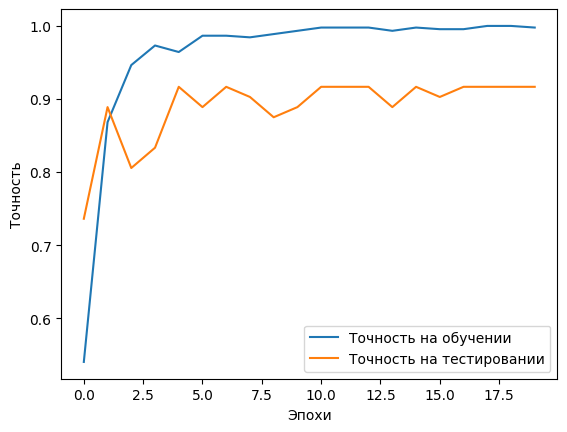

In [ ]:
# Визуализация точности и потерь
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

#Восьмая попытка 1

In [8]:
# Параметры изображений
img_height, img_width = 512, 384 # Размер изображений
batch_size = 8

In [ ]:
# Создание генератора данных для обучения
train_datagen = ImageDataGenerator(
    rescale=1./255, # Нормализация пикселей
    rotation_range=3,       # случайный поворот на ±30°
    width_shift_range=0.1,   # случайный сдвиг по ширине
    height_shift_range=0.1,  # случайный сдвиг по высоте
    shear_range=0.1,        # случайный наклон
    zoom_range=0.1,         # случайное масштабирование
    #horizontal_flip=True,   # случайное отражение по горизонтали
    fill_mode='nearest',     # заполнение пикселей при трансформациях
    validation_split=0.15
)

In [ ]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

In [ ]:
# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=4,
    class_mode='categorical', # Для многоклассовой классификации
    subset='training'
)

Found 448 images belonging to 8 classes.


In [ ]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

Found 72 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(512, 384, 3))
base_model.trainable = False  # Замораживаем веса

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Заменяет Flatten + уменьшает число параметров
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

<ipython-input-10-78bf0df43add>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(512, 384, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callback для сохранения лучших весов модели
checkpoint = ModelCheckpoint(
    'best_model.h5',             # имя файла для сохранения
    monitor='val_accuracy',       # мониторим точность на валидации
    save_best_only=True,          # сохраняем только лучшую модель
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации о сохранении
)

In [ ]:
# Callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_accuracy',       # мониторим точность на валидации
    patience=15,                   # ждём 5 эпох без улучшения
    restore_best_weights=True,    # восстанавливаем веса лучшей модели
    mode='max',                   # критерий - максимизация точности
    verbose=1                     # вывод информации об остановке
)

In [ ]:
# Обучение модели с callback'ами
history = model.fit(
    train_generator,
    epochs=75,                    # теперь можно поставить больше эпох
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]  # добавляем наши callback'и
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3619 - loss: 1.8310
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to best_model.h5


112/112 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.3635 - loss: 1.8275 - val_accuracy: 0.7500 - val_loss: 1.1235
Epoch 2/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8613 - loss: 0.6122
Epoch 2: val_accuracy improved from 0.75000 to 0.86111, saving model to best_model.h5


112/112 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8616 - loss: 0.6112 - val_accuracy: 0.8611 - val_loss: 0.6777
Epoch 3/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9361 - loss: 0.3665
Epoch 3: val_accuracy improved from 0.86111 to 0.90278, saving model to best_model.h5


112/112 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9361 - loss: 0.3661 - val_accuracy: 0.9028 - val_loss: 0.4666
Epoch 4/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9486 - loss: 0.1949
Epoch 4: val_accuracy did not improve from 0.90278
112/112 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9487 - loss: 0.1946 - val_accuracy: 0.8889 - val_loss: 0.3587
Epoch 5/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9667 - loss: 0.1547
Epoch 5: val_accuracy did not improve from 0.90278
112/112 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9667 - loss: 0.1547 - val_accuracy: 0.9028 - val_loss: 0.3521
Epoch 6/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9962 - loss: 0.0897
Epoch 6: val_accuracy did not improve from 0.90278
112/112 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9961 - loss: 0.0898 - val_accuracy: 0.9028 - val_loss: 0.4008
Epoch 7/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9928 - loss: 0.0731
Epoch 7: val_accuracy improved from

112/112 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9928 - loss: 0.0732 - val_accuracy: 0.9167 - val_loss: 0.3189
Epoch 8/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9988 - loss: 0.0632
Epoch 8: val_accuracy did not improve from 0.91667
112/112 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9988 - loss: 0.0631 - val_accuracy: 0.8611 - val_loss: 0.3495
Epoch 9/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9838 - loss: 0.0770
Epoch 9: val_accuracy did not improve from 0.91667
112/112 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9838 - loss: 0.0770 - val_accuracy: 0.9028 - val_loss: 0.3649
Epoch 10/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9988 - loss: 0.0293
Epoch 10: val_accuracy did not improve from 0.91667
112/112 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9987 - loss: 0.0294 - val_accuracy: 0.9167 - val_loss: 0.2885
Epoch 11/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9816 - loss: 0.0532
Epoch 11: val_accuracy did not i

112/112 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9968 - loss: 0.0325 - val_accuracy: 0.9444 - val_loss: 0.1734
Epoch 18/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9977 - loss: 0.0233
Epoch 18: val_accuracy did not improve from 0.94444
112/112 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9977 - loss: 0.0234 - val_accuracy: 0.9306 - val_loss: 0.2419
Epoch 19/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9942 - loss: 0.0255
Epoch 19: val_accuracy did not improve from 0.94444
112/112 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9943 - loss: 0.0254 - val_accuracy: 0.9306 - val_loss: 0.2216
Epoch 20/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9988 - loss: 0.0154
Epoch 20: val_accuracy did not improve from 0.94444
112/112 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9988 - loss: 0.0154 - val_accuracy: 0.9028 - val_loss: 0.3105
Epoch 21/75
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9980 - loss: 0.0239
Epoch 21: val_accuracy did n

In [ ]:
full_loss, full_accuracy = model.evaluate(val_generator)
print(f"Точность на тестовой выборке: {full_accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 835ms/step - accuracy: 0.9686 - loss: 0.1118
Точность на тестовой выборке: 94.44%


In [ ]:
full_loss, full_accuracy = model.evaluate(train_generator)
print(f"Точность на обучающей выборке: {full_accuracy * 100:.2f}%")

112/112 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 1.0000 - loss: 0.0029
Точность на обучающей выборке: 100.00%


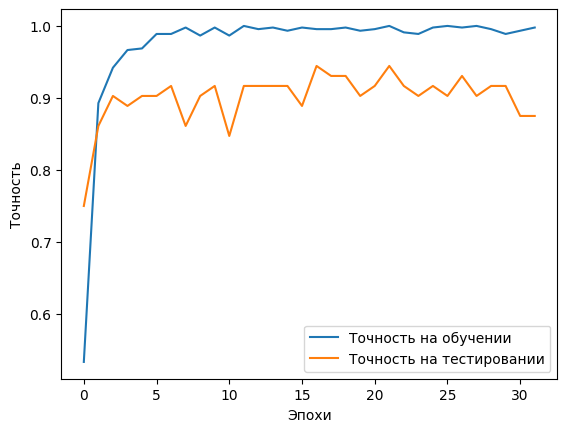

In [ ]:
# Визуализация точности и потерь
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на тестировании')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
model.save('best_model_full.h5')

In [ ]:
model.save('Centr.keras')

#Взаимодействие

In [4]:
from tensorflow.keras.models import load_model

# Загрузка модели из файла
model2 = load_model('Centr.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image

def prepare_image(img_path, target_size=(512, 384)):
    img = image.load_img(img_path, target_size=target_size)  # изменяем размер
    img_array = image.img_to_array(img)  # в массив numpy
    img_array = np.expand_dims(img_array, axis=0)  # добавляем размерность батча (1, 224, 224, 3)

    # Нормализация (если модель обучалась на [0,1] или [-1, 1])
    img_array = img_array / 255.0  # для [0, 1]
    # img_array = (img_array / 127.5) - 1  # для [-1, 1]

    return img_array

In [34]:
img = prepare_image('/content/Cvet/8/IMG_20250518_103213.jpg')  # путь к вашему изображению

In [35]:
predictions = model2.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [36]:
predictions

array([[5.2720046e-05, 9.8780291e-08, 3.2744985e-05, 5.8826361e-05,
        5.0022317e-07, 2.7621234e-05, 1.0986287e-05, 9.9981648e-01]],
      dtype=float32)

In [38]:
predicted_class = np.argmax(predictions, axis=1)  # индекс класса с максимальной вероятностью
print("Предсказанный класс:", predicted_class)

Предсказанный класс: [7]


In [5]:
test_dir = '/content/drive/MyDrive/Cvet'

In [6]:
# Только нормализация для валидации
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Загрузка валидационного набора (опционально, для проверки во время обучения)
val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8 images belonging to 8 classes.


In [10]:
# Оценка модели
full_loss, full_accuracy = model2.evaluate(val_generator)
print(f"Точность на перекрашенной выборке: {full_accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 0.0307
Точность на перекрашенной выборке: 100.00%


In [ ]:
model.save('Doma.keras')